In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e4/sample_submission.csv
/kaggle/input/playground-series-s4e4/train.csv
/kaggle/input/playground-series-s4e4/test.csv


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv(r'/kaggle/input/playground-series-s4e4/train.csv')
train = train.set_index("id")
test = pd.read_csv(r'/kaggle/input/playground-series-s4e4/test.csv')
#original = pd.read_csv(f'/kaggle/input/playgrounds4e04originaldata/Original.csv', index_col=0)

In [4]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
encoded_data = ohe.fit_transform(train[["Sex"]]).toarray()

ohe1 = OneHotEncoder(handle_unknown='ignore')
encoded_a_data = ohe1.fit_transform(test[["Sex"]]).toarray()

In [12]:
train[ohe.get_feature_names_out()] = encoded_data
test[ohe1.get_feature_names_out()] = encoded_a_data
test = test.drop('Sex', axis=1)
train = train.drop('Sex', axis=1)

In [15]:
train

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,1.0,0.0,0.0
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,1.0,0.0,0.0
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,0.0,1.0,0.0
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,0.0,0.0,1.0
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
90610,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6,0.0,0.0,1.0
90611,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9,0.0,0.0,1.0
90612,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6,0.0,1.0,0.0


In [43]:
feature , lable = train[['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
                            'Whole weight.2', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M']],train["Rings"]

In [58]:
def feature_engineering(feature):
    feature["L/D"] = feature['Length']/feature["Diameter"]
    feature["D/H"] = feature["Diameter"]/feature["Height"]
    feature["weight_ratio1"] = feature["Whole weight"]/feature["Whole weight.1"]
    feature["weight_ratio2"] = feature["Whole weight"]/feature["Whole weight.2"]
    feature["weight_shell"] = feature["Whole weight"]/feature["Shell weight"]
    feature["logLength"] = np.log(feature["Length"])
    feature["logDiameter"] = np.log(feature["Diameter"])
    feature["logHeight"] = np.log(feature["Height"] + 1e-6)
    feature["logWhole weight"] = np.log(feature["Whole weight"])
    feature["logWhole weight.1"] = np.log(feature["Whole weight.1"])
    feature["logWhole weight.2"] = np.log(feature["Whole weight.2"])
    feature["logShell weight"] = np.log(feature["Shell weight"])
    feature["Vol"] = feature["Length"] * feature["Diameter"] * feature["Height"]
    r = feature["Diameter"] / 2
    feature["SurfArea"] = 2 * np.pi * r * feature["Height"] + 2 * np.pi * r**2
    feature["Density"] = feature["Whole weight"] / feature["Vol"]
    feature["Meat/Shell"] = feature["Whole weight.2"] / feature["Shell weight"]
    feature["Viscera/Meat"] = feature["Whole weight.1"] / feature["Whole weight.2"]
    feature["Total/Shell"] = feature["Whole weight"] / feature["Shell weight"]


    return feature
test = feature_engineering(test)
feature = feature_engineering(feature)

In [64]:
feature

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_F,Sex_I,Sex_M,...,logWhole weight,logWhole weight.1,logWhole weight.2,logShell weight,Vol,SurfArea,Density,Meat/Shell,Viscera/Meat,Total/Shell
id,,,,,,,,,,,,,,,,,,,,,
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,1.0,0.0,0.0,...,-0.259419,-1.113218,-1.920730,-1.427116,0.035475,0.493073,21.747710,0.610417,2.242321,3.214583
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,1.0,0.0,0.0,...,0.122218,-0.780886,-1.285544,-1.139434,0.044761,0.600358,25.244909,0.864063,1.656420,3.531250
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,0.0,1.0,0.0,...,-3.863233,-5.203007,-5.809143,-5.298317,0.000440,0.027646,47.727273,0.600000,1.833333,4.200000
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,0.0,0.0,1.0,...,-0.089378,-0.979497,-1.582309,-1.386294,0.042394,0.578249,21.571576,0.822000,1.827251,3.658000
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,0.0,1.0,0.0,...,-0.245901,-0.995605,-1.832581,-1.622017,0.030664,0.457298,25.502426,0.810127,2.309375,3.959494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90610,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,0.0,0.0,1.0,...,-1.842001,-2.680922,-3.296837,-3.101093,0.005904,0.142118,26.844501,0.822222,1.851351,3.522222
90611,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,0.0,0.0,1.0,...,-0.128970,-0.950623,-1.706500,-1.427116,0.035381,0.484002,24.843667,0.756250,2.129477,3.662500
90612,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,0.0,1.0,0.0,...,-1.134758,-1.890475,-2.544657,-2.507152,0.013637,0.269549,23.575134,0.963190,1.923567,3.944785


In [65]:
sns.pairplot(feature.sample(1000), # Sample some individuals
             hue=["Sex_F","Sex_I","Sex_M"], 
             palette='Set1', 
             height=1.6) 
plt.suptitle('pairplot of train features', fontsize=16)
plt.tight_layout()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


ValueError: could not broadcast input array from shape (1000,3) into shape (1000,)

Error in callback <function _draw_all_if_interactive at 0x7c5810b33420> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7c5810b311c0> (for post_execute):


KeyboardInterrupt: 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

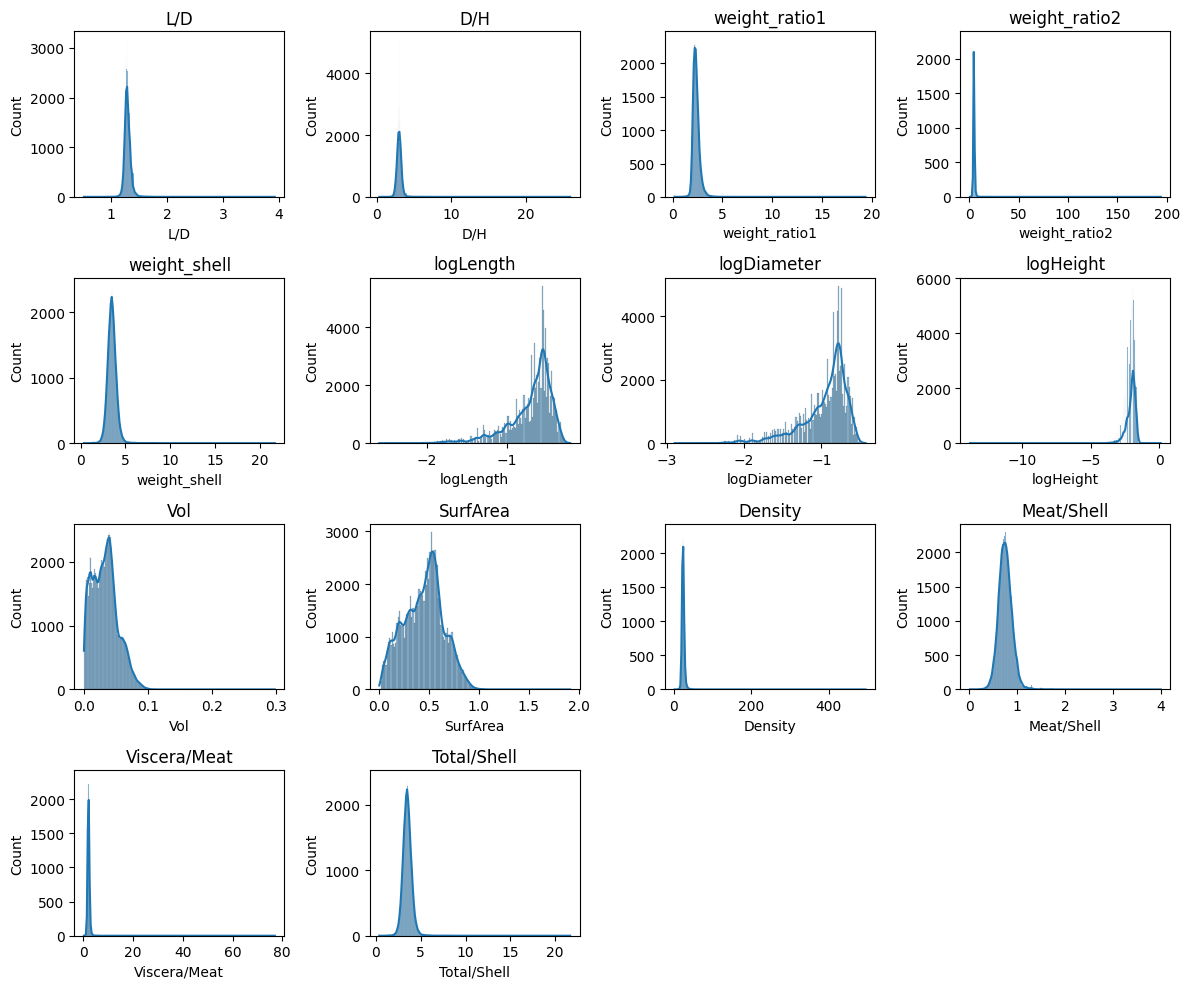

In [60]:
subs = [
    "L/D", "D/H",
    "weight_ratio1", "weight_ratio2", "weight_shell",
    "logLength", "logDiameter", "logHeight",
    "Vol", "SurfArea", "Density",
    "Meat/Shell", "Viscera/Meat", "Total/Shell"
]
# 1) Distribution plots (histograms + KDE)
plt.figure(figsize=(12, 10))
for i, col in enumerate(subs, 1):
    plt.subplot(4, 4, i)
    sns.histplot(feature[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error

In [50]:
x_train,x_test,y_train,y_test = train_test_split(feature,lable,test_size=0.2,random_state=37)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((72492, 22), (18123, 22), (72492,), (18123,))